In [8]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 3.8 MB 45.1 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 503 kB 69.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6fd07f7b00390590d6817bb38b7418d81bde36e737e8bd24fa0dff909d84b6da
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [9]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.7 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [10]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.0 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=77b94fd8edc6de841afbb9179af44adc645183b7737787eafae598293767ea27
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [11]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2899968/45929032 bytes (6.3%)6332416/45929032 bytes (13.8%)9592832/45929032 bytes (20.9%)12656640/45929032 bytes (27.6%)15130624/45929032 bytes (32.9%)17350656/45929032 bytes (37.8%)19415040/45929032 bytes (42.3%)21643264/45929032 bytes (47.1%)24059904/45929032 bytes (52.4%)26714112/45929032 bytes (58.2%)29335552/45929032 bytes (63.9%)31997952/45929032 bytes (69.7%)

In [13]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


|      x      |      y      |      d      |      Zone 0      |      Original Zone      
|      3      |      10      |      3      |      (3, 10)      
------------------------------------------------------------------
|      4      |      11      |      -1      |      (4, 11)      
------------------------------------------------------------------
|      5      |      11      |      9      |      (5, 11)      
------------------------------------------------------------------
|      6      |      12      |      5      |      (6, 12)      
------------------------------------------------------------------
|      7      |      13      |      1      |      (7, 13)      
------------------------------------------------------------------
|      8      |      14      |      -3      |      (8, 14)      
------------------------------------------------------------------
|      9      |      14      |      7      |      (9, 14)      
------------------------------------------------------------


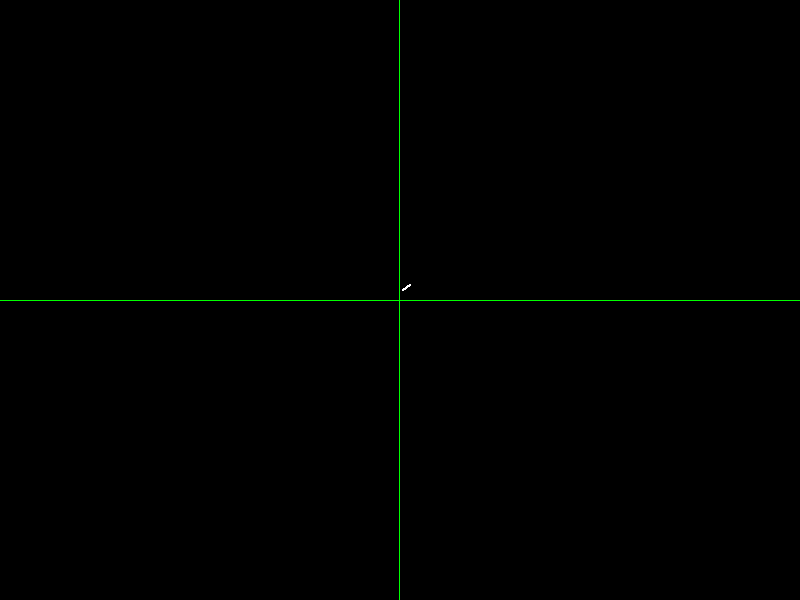

In [28]:
# Let's render something!
import random
def ownVertex(x,y):
  gl.glVertex2f(x/(WIDTH/2), y/(HEIGHT/2))
def colorChange(x,y,z):
  gl.glColor3f(x,y,z)

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def pointDraw(cordinates_list):
  for item in cordinates_list:
    ordinate,abscissa = item
    ownVertex(ordinate,abscissa)
def topHeader():
  top = 10+33+15+8
  space= 6
  print("="*top)
  print("|",end="")
  print(" "*space,end="")
  print("x",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("y",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("d",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("Pixel",end="")
  print(" "*space)
  print("="*top)
def topHeader_EightWay():
  top = 10+33+15+8+12
  space= 6
  print("="*top)
  print("|",end="")
  print(" "*space,end="")
  print("x",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("y",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("d",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("Zone 0",end="")
  print(" "*space,end="")
  print("|",end="")
  print(" "*space,end="")
  print("Original Zone",end="")
  print(" "*space)
  print("="*top)

def midPointAlgo(f_cordinate,s_cordinate):
  cordinates= []
  x_1,y_1 = f_cordinate
  x_2,y_2 = s_cordinate
  dx = x_2 - x_1
  dy = y_2 - y_1
  d_init = 2*dy - dx
  d = d_init
  incrE, incrNE = 2 * dy,2 * (dy - dx)
  temp_x,temp_y = x_1,y_1
  topHeader_EightWay()
  while temp_x<=x_2:
    cordinates.append((temp_x,temp_y))
    top = 10+33+15+8
    space= 6
    print("|",end="")
    print(" "*space,end="")
    print(temp_x,end="")
    print(" "*space,end="")
    print("|",end="")
    print(" "*space,end="")
    print(temp_y,end="")
    print(" "*space,end="")
    print("|",end="")
    print(" "*space,end="")
    print(d,end="")
    print(" "*space,end="")
    print("|",end="")
    print(" "*space,end="")
    print((temp_x,temp_y),end="")
    print(" "*space)
    print("-"*top)
    #print(temp_x,temp_y)
    if d>0: #NE
      d += incrNE
      temp_x += 1
      temp_y += 1
    elif d<0:
      d += incrE
      temp_x += 1
  return cordinates

# X,Y=0,0
# pointDraw(X,Y,5,(250,150,170))
gl.glColor3f(0, 255, 0)
gl.glPointSize(5)
gl.glBegin(gl.GL_LINES)
ownVertex(0,HEIGHT/2)
ownVertex(0,-HEIGHT/2)
gl.glEnd()
gl.glColor3f(0, 255, 0)
gl.glBegin(gl.GL_LINES)
ownVertex(WIDTH/2,0)
ownVertex(-WIDTH/2,0)
gl.glEnd()

colorChange(255,255,255)
gl.glPointSize(2)
gl.glBegin(gl.GL_POINTS)
cordinates_list = midPointAlgo((3,10),(10,15))
pointDraw(cordinates_list)
gl.glEnd()

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

Zone 0
|      x      |      y      |      d      |      Zone 0      |      Original Zone      
|      -35      |      -40      |      35      |      (-35, -40)      
------------------------------------------------------------------
|      -34      |      -39      |      -15      |      (-34, -39)      
------------------------------------------------------------------
|      -33      |      -39      |      105      |      (-33, -39)      
------------------------------------------------------------------
|      -32      |      -38      |      55      |      (-32, -38)      
------------------------------------------------------------------
|      -31      |      -37      |      5      |      (-31, -37)      
------------------------------------------------------------------
|      -30      |      -36      |      -45      |      (-30, -36)      
------------------------------------------------------------------
|      -29      |      -36      |      75      |      (-29, -36)      
----


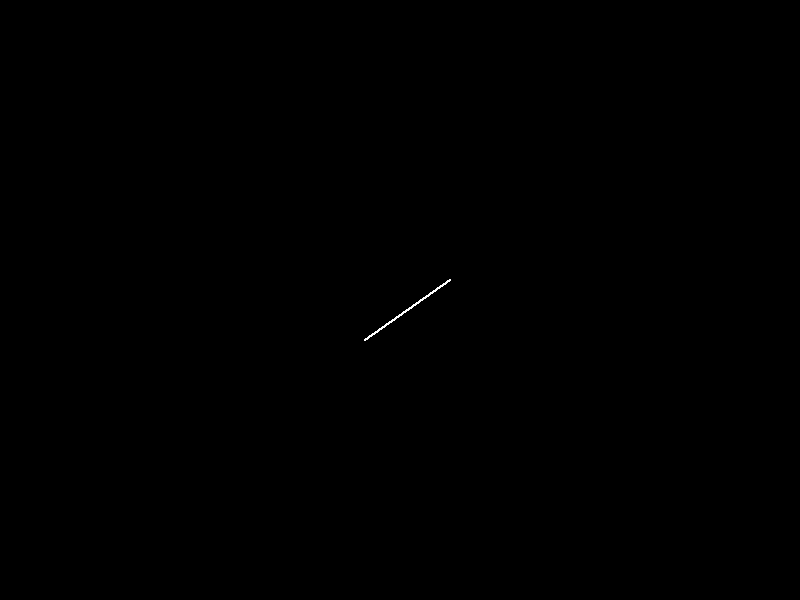

In [29]:
#from typing_extensions import ParamSpecKwargs
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

def ZoneCovert(f_cordinate,s_cordinate):
  x_1,y_1 = f_cordinate
  x_2,y_2 = s_cordinate
  dx = x_2 - x_1
  dy = y_2 - y_1
  if abs(dx)>= abs(dy):
    if dx>0 and dy>0:
      print("Zone 0")
      #zone 0
      return f_cordinate,s_cordinate,0
    elif dx<0 and dy>0:
      #zone 3
      print("Zone 3")
      return (-x_1,y_1),(-x_2 ,y_2),3
    elif dx<0 and dy<0:
      #zone 4
      print("Zone 4")
      return (-x_1,-y_1),(-x_2 ,-y_2),4
    elif dx>0 and dy<0:
      #zone 7
      print("Zone 7")
      return (x_1,-y_1),(x_2 ,-y_2),7
  elif abs(dx)<= abs(dy):
    if dx>0 and dy>0:
      #zone1
      print("Zone 1")
      return (y_1,x_1),(y_2,x_2),1
    elif dx<0 and dy>0:
      #zone 2
      print("Zone 2")
      return (y_1,-x_1),(y_2,-x_2),2
    elif dx<0 and dy<0:
      print("Zone 5")
      #zone 5
      return (-y_1,-x_1),(-y_2,-x_2),5
    elif dx>0 and dy<0:
      print("Zone 6")
      #zone 6
      return (-y_1,x_1),(-y_2,x_2),6
def originalZone(cordinates,zone):
  new_cordinates = []
  if zone == 0:
    return cordinates
  elif zone == 1:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,x))
    return new_cordinates
  elif zone == 2:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,x))
    return new_cordinates
  elif zone == 3:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,y))
    return new_cordinates
  elif zone == 4:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,-y))
    return new_cordinates
  elif zone == 5:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,-x))
    return new_cordinates
  elif zone == 6:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,-x))
    return new_cordinates
  elif zone == 7:
    for item in cordinates:
      x,y = item
      new_cordinates.append((x,-y))
    return new_cordinates

cordinate_1,cordinate_2,zone = ZoneCovert((-35,-40),(50,20))
cordinates_list = midPointAlgo(cordinate_1,cordinate_2)
original_cordinates_list=originalZone(cordinates_list,zone)

colorChange(255,255,255)
gl.glPointSize(2)
gl.glBegin(gl.GL_POINTS)
pointDraw(original_cordinates_list)
print("="*20)
print(original_cordinates_list)
gl.glEnd()
    




img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)